#Parcial 2 POO: TrashCity, JUAN PABLO GUZMAN RESTREPO 19/05/2023

---



La empresa de manejo de residuos “TrashCity” necesita un sistema de información
para administrar su operación. El primer servicio de la empresa consiste en la
recolección de los residuos de la ciudad: camiones de la empresa recorren la ciudad
en rutas preestablecidas tomando los residuos dispuestos por los usuarios. Una ruta
contiene la serie de puntos geográficos (latitud, longitud) por donde debe pasar es
camión.
Cada camión cuenta con un conductor y dos asistentes de recolección en un turno. Un turno
define el recorrido completo de un camión y su equipo a recoger residuos, en un rango de día
y hora de inicio y finalización, siguiendo una de las rutas existentes. En el turno se almacena
la localización geográfica y tiempo en el que pasó en su recorrido.
Al final de turno, la carga del camión pasa a ser clasificada en un centro de acopio. El
resultado de la separación se almacena en el sistema asociado al turno: cuántas toneladas
de vidrio, papel, plástico, metal y residuos orgánicos.
De los elementos camión y persona se almacena información básica de identificación.
Para resolver este problema usted debe:
a. Realizar un diagrama de clase UML para representar el modelo de la solución.
(Criterios de evaluación: Clases necesarias, relaciones adecuadas, uso del estándar,
estructura que reduce redundancia de información y facilidad de acceso a la
información)
b. Implemente en Python los métodos que permitan el cálculo de la cantidad de vidrio
que se recogió en todas las rutas de un día en específico. Asuma que métodos get y
set de los atributos ya existen, y que clases como LocalDateTime ya existen en el
sistema. La clase de punto geográfico debe ser definida por en el UML.
c. Implemente un plan de pruebas donde verifique la funcionalidad de su solución para
este sistema de información.
Nota: Deberá compartir si solución como un repositorio en git, donde se encuentre todo lo
necesario para poder ejecutar y así mismo la documentación lo más detallada posible.

#A. Diagrama de clase UML:

---

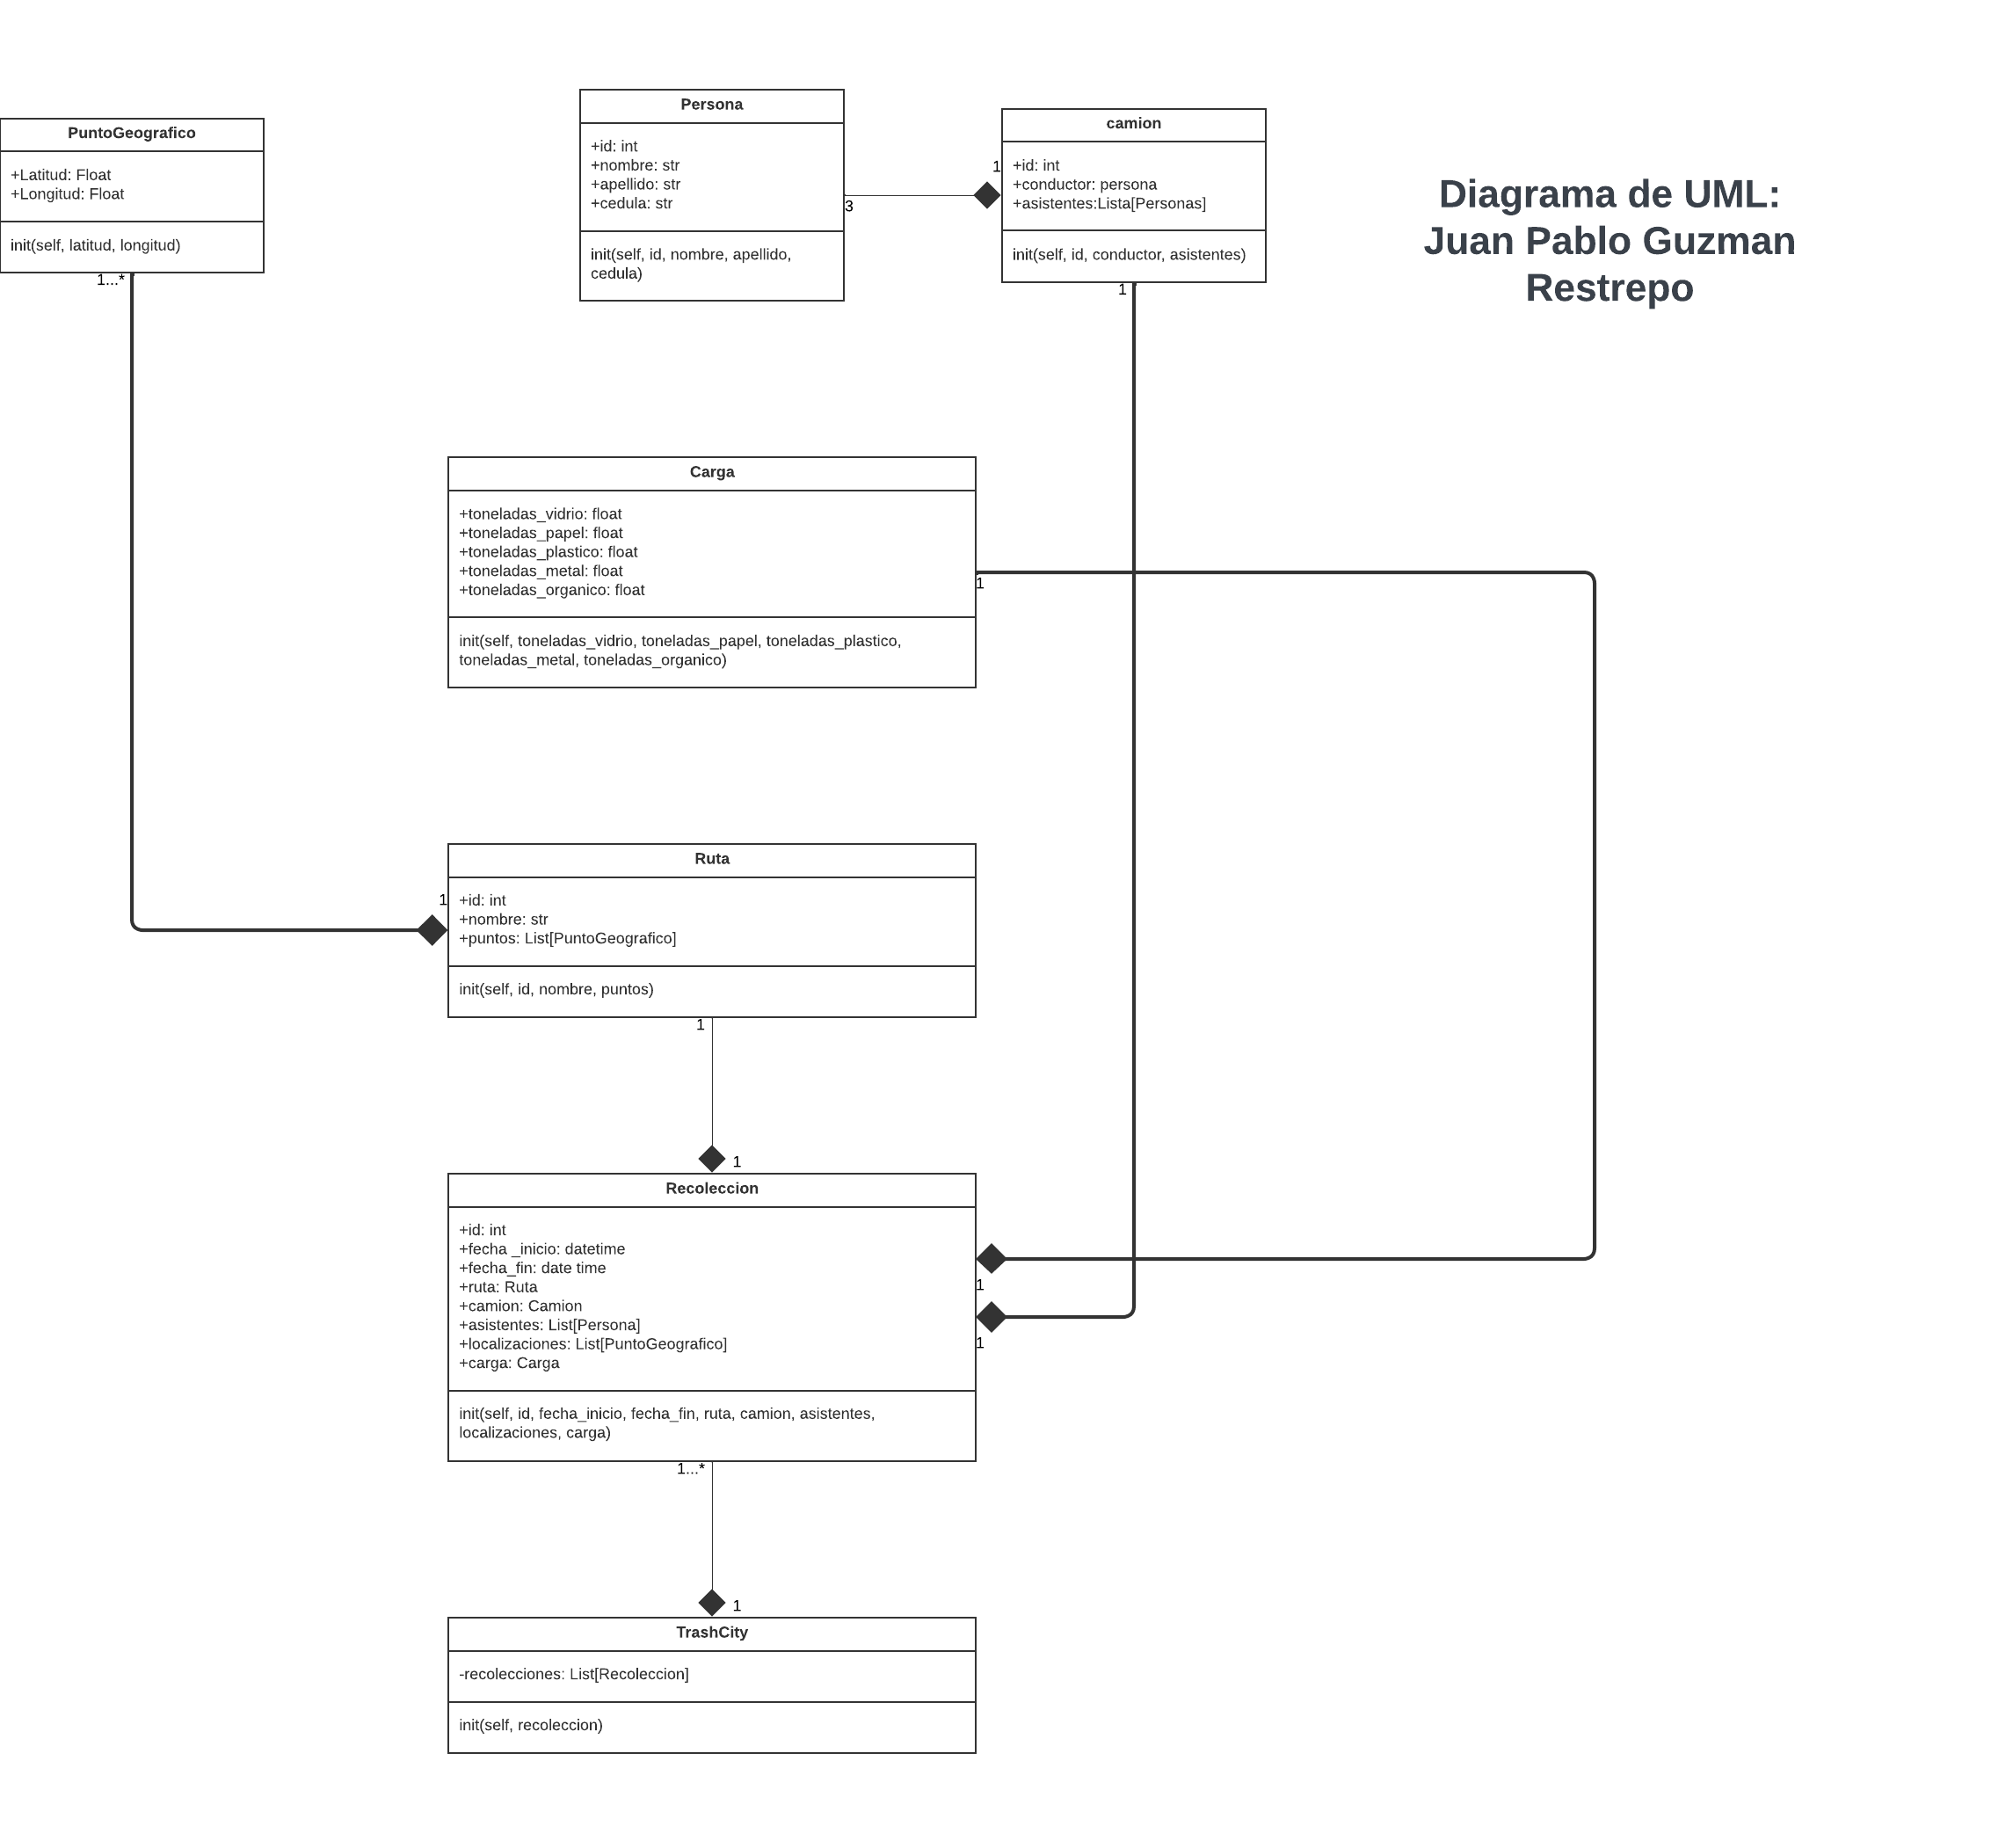

#B. Programa en python:


Requisitos: tener en cuenta la correcta escritura del codigo para que este sea 

facil de entender:

---



In [3]:
from datetime import datetime, timedelta

class PuntoGeografico:
    def __init__(self, latitud, longitud):
        self.latitud = latitud
        self.longitud = longitud

class Persona:
    def __init__(self, id, nombre, apellido, cedula):
        self.id = id
        self.nombre = nombre
        self.apellido = apellido
        self.cedula = cedula

class Camion:
    def __init__(self, id, conductor, asistentes):
        self.id = id
        self.conductor = conductor
        self.asistentes = asistentes

class Carga:
    def __init__(self, toneladas_vidrio, toneladas_papel, toneladas_plastico, toneladas_metal, toneladas_organico):
        self.toneladas_vidrio = toneladas_vidrio
        self.toneladas_papel = toneladas_papel
        self.toneladas_plastico = toneladas_plastico
        self.toneladas_metal = toneladas_metal
        self.toneladas_organico = toneladas_organico

class Ruta:
    def __init__(self, id, nombre, puntos):
        self.id = id
        self.nombre = nombre
        self.puntos = puntos

class Recoleccion:
    def __init__(self, id, fecha_inicio, fecha_fin, ruta, camion, asistentes, localizaciones, carga):
        self.id = id
        self.fecha_inicio = fecha_inicio
        self.fecha_fin = fecha_fin
        self.ruta = ruta
        self.camion = camion
        self.asistentes = asistentes
        self.localizaciones = localizaciones
        self.carga = carga

    def calcular_toneladas_vidrio_en_dia(self, dia):
        if self.fecha_inicio.date() == dia:
            return self.carga.toneladas_vidrio
        else:
            return 0

class TrashCity:
    def __init__(self, recolecciones):
        self.recolecciones = recolecciones

    def calcular_toneladas_vidrio_en_dia(self, dia):
        total_vidrio = 0
        for recoleccion in self.recolecciones:
            total_vidrio += recoleccion.calcular_toneladas_vidrio_en_dia(dia)
        return total_vidrio

###EJEMPLO con valores arbitrarios para calcular la cantidad de vidrio:

---



In [4]:

punto1 = PuntoGeografico(10.123456, -75.456789)
punto2 = PuntoGeografico(10.234567, -75.567890)
punto3 = PuntoGeografico(10.345678, -75.678901)
ruta1 = Ruta(1, "Ruta 1", [punto1, punto2, punto3])
persona1 = Persona(1, "Juan", "Guzman", "1193548728")
camion1 = Camion(1, persona1, 2)
carga1 = Carga(2.5, 1.5, 3.0, 1.0, 2.0)
recoleccion1 = Recoleccion(1, datetime(2023, 4, 1, 8, 0), datetime(2023, 4, 1, 12, 0), ruta1, camion1, 2, [punto1, punto2], carga1)
carga2 = Carga(1.0, 2.5, 1.0, 0.5, 3.0)
recoleccion2 = Recoleccion(2, datetime(2023, 4, 1, 13, 0), datetime(2023, 4, 1, 17, 0), ruta1, camion1, 2, [punto2, punto3], carga2)
trashcity = TrashCity([recoleccion1, recoleccion2])

# Para calcular la cantidad de toneladas de vidrio recogidas en este dia (punto b del parcial):
dia = datetime(2023, 4, 1).date()
toneladas_vidrio = trashcity.calcular_toneladas_vidrio_en_dia(dia)
print(f"En el día: {dia}, se recogieron: {toneladas_vidrio} toneladas de vidrio.")

En el día: 2023-04-01, se recogieron: 3.5 toneladas de vidrio.


#C. Se realiza la respectiva prueba Unitaria del codigo:

Se realiza la prueba unitaria para la funcion del codigo que permite calcular las toneladas de vidrios recolectada:

---



In [5]:
import unittest
from datetime import datetime

# Importar las clases y funciones que se van a probar

class TestTrashCity(unittest.TestCase):

    def setUp(self):
        # Configurar los objetos necesarios para las pruebas
        punto1 = PuntoGeografico(10.123456, -75.456789)
        punto2 = PuntoGeografico(10.234567, -75.567890)
        punto3 = PuntoGeografico(10.345678, -75.678901)
        ruta1 = Ruta(1, "Ruta 1", [punto1, punto2, punto3])
        persona1 = Persona(1, "Juan", "Guzman", "1193548728")
        camion1 = Camion(1, persona1, 2)
        carga1 = Carga(2.5, 1.5, 3.0, 1.0, 2.0)
        recoleccion1 = Recoleccion(1, datetime(2023, 4, 1, 8, 0), datetime(2023, 4, 1, 12, 0), ruta1, camion1, 2, [punto1, punto2], carga1)
        carga2 = Carga(1.0, 2.5, 1.0, 0.5, 3.0)
        recoleccion2 = Recoleccion(2, datetime(2023, 4, 1, 13, 0), datetime(2023, 4, 1, 17, 0), ruta1, camion1, 2, [punto2, punto3], carga2)
        self.trashcity = TrashCity([recoleccion1, recoleccion2])

    def test_calcular_toneladas_vidrio_en_dia(self):
        dia = datetime(2023, 4, 1).date()
        toneladas_vidrio = self.trashcity.calcular_toneladas_vidrio_en_dia(dia)
        self.assertEqual(toneladas_vidrio, 3.5)  # Asegurar que el resultado sea el esperado

    # Agregar más pruebas unitarias para otras funcionalidades

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'],exit=False)


.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK
